# K-nearest-neighbor regression: fit

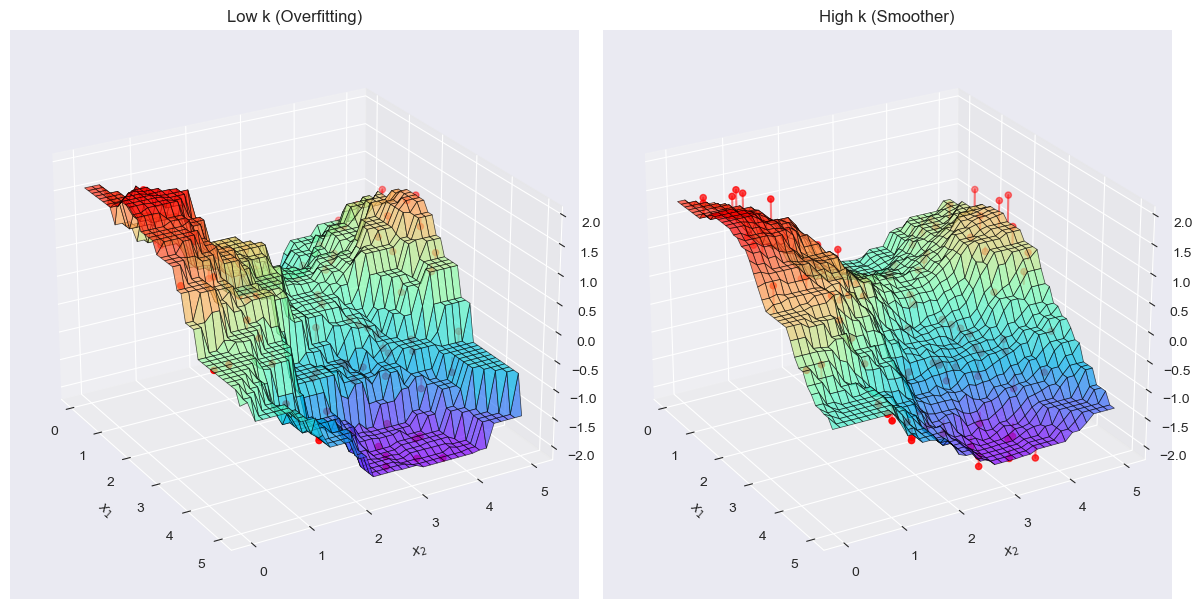

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# 1. Generate synthetic 3D data
np.random.seed(0)
n_samples = 100
x1 = np.random.uniform(0, 5, size=n_samples)
x2 = np.random.uniform(0, 5, size=n_samples)
y = np.sin(x1) + np.cos(x2) + 0.1 * np.random.randn(n_samples)

X = np.column_stack((x1, x2))

# 2. Create a grid for surface plotting
x1_lin = np.linspace(0, 5, 40)
x2_lin = np.linspace(0, 5, 40)
x1_grid, x2_grid = np.meshgrid(x1_lin, x2_lin)
X_grid = np.column_stack((x1_grid.ravel(), x2_grid.ravel()))

# 3. Fit two KNN models with different values of k
knn_low_k = KNeighborsRegressor(n_neighbors=2)
knn_high_k = KNeighborsRegressor(n_neighbors=10)

knn_low_k.fit(X, y)
knn_high_k.fit(X, y)

y_pred_low = knn_low_k.predict(X_grid).reshape(x1_grid.shape)
y_pred_high = knn_high_k.predict(X_grid).reshape(x1_grid.shape)

# 4. Plot the surfaces
fig = plt.figure(figsize=(12, 6))

for i, (y_pred, title) in enumerate(zip([y_pred_low, y_pred_high], ['Low k (Overfitting)', 'High k (Smoother)'])):
    ax = fig.add_subplot(1, 2, i + 1, projection='3d')
    surf = ax.plot_surface(x1_grid, x2_grid, y_pred, cmap=cm.rainbow, alpha=0.7, edgecolor='k', linewidth=0.5)

    # Plot original data points
    ax.scatter(x1, x2, y, color='red', s=20, label='Data')
    
    # Vertical lines from data points to surface
    for j in range(n_samples):
        pred_y = knn_low_k.predict([[x1[j], x2[j]]]) if i == 0 else knn_high_k.predict([[x1[j], x2[j]]])
        ax.plot([x1[j], x1[j]], [x2[j], x2[j]], [y[j], pred_y[0]], color='red', alpha=0.5)

    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$y$')
    ax.set_title(title)
    ax.view_init(elev=25, azim=-30)

plt.tight_layout()
plt.show()


# Measuring goodness of fit: residual plot

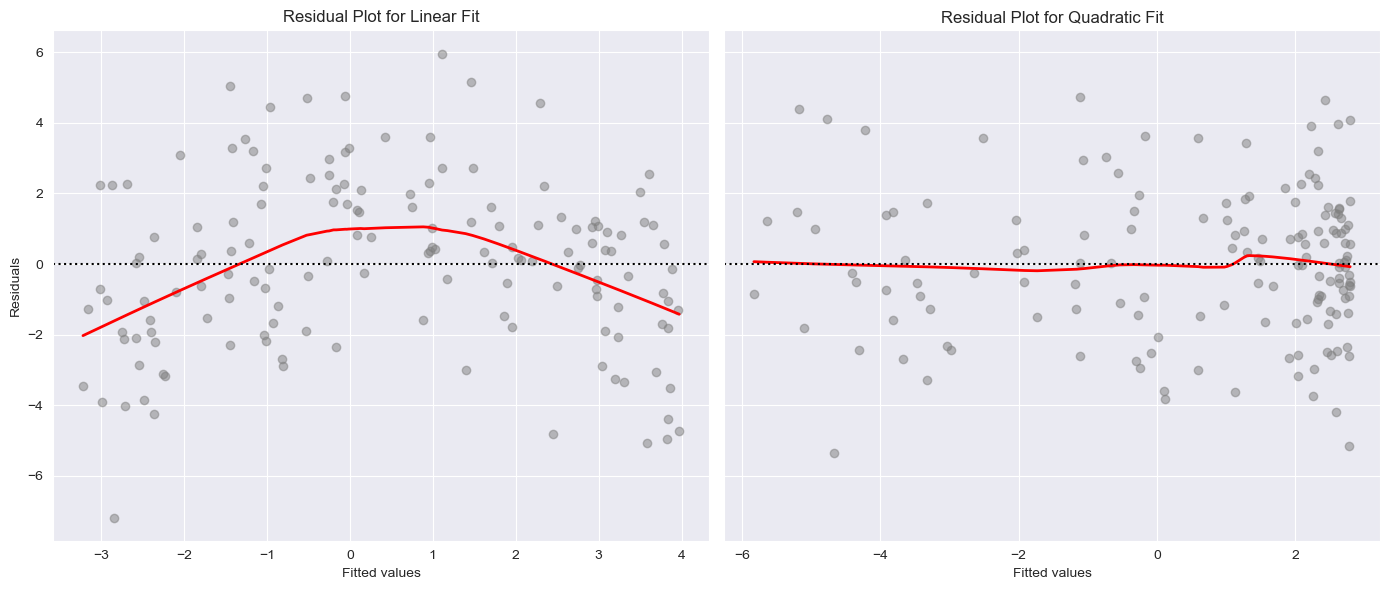

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# 1. Generate synthetic data
np.random.seed(1)
X = np.sort(5 * np.random.rand(150, 1), axis=0)
y = 2 + X.flatten() - 0.5 * X.flatten() ** 2 + np.random.randn(150) * 2

# 2. Fit Linear and Quadratic Models
linear_model = LinearRegression()
quadratic_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

linear_model.fit(X, y)
quadratic_model.fit(X, y)

y_pred_linear = linear_model.predict(X)
y_pred_quadratic = quadratic_model.predict(X)

residuals_linear = y - y_pred_linear
residuals_quadratic = y - y_pred_quadratic

# 3. Create Residual Plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- Left: Linear Fit ---
axes[0].scatter(y_pred_linear, residuals_linear, color='gray', alpha=0.5)
sns.regplot(x=y_pred_linear, y=residuals_linear, lowess=True,
            ax=axes[0], scatter=False, color='red', line_kws={'linewidth': 2})
axes[0].axhline(0, linestyle='dotted', color='black')
axes[0].set_title("Residual Plot for Linear Fit")
axes[0].set_xlabel("Fitted values")
axes[0].set_ylabel("Residuals")

# --- Right: Quadratic Fit ---
axes[1].scatter(y_pred_quadratic, residuals_quadratic, color='gray', alpha=0.5)
sns.regplot(x=y_pred_quadratic, y=residuals_quadratic, lowess=True,
            ax=axes[1], scatter=False, color='red', line_kws={'linewidth': 2})
axes[1].axhline(0, linestyle='dotted', color='black')
axes[1].set_title("Residual Plot for Quadratic Fit")
axes[1].set_xlabel("Fitted values")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


## least squares fit visualised

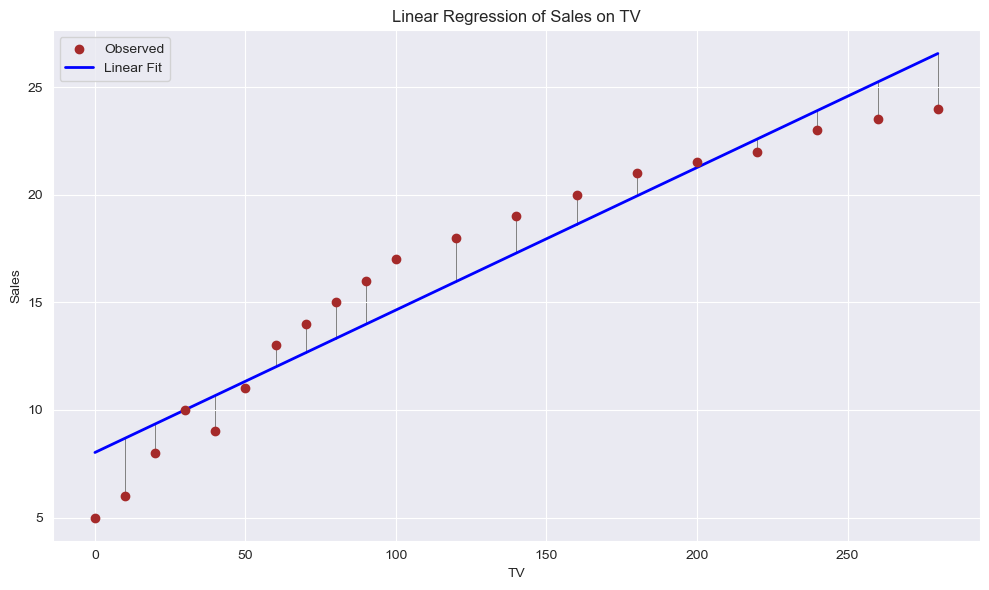

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load Advertising data (replace with your path or URL if needed)
# Here's an example dataset as dictionary:
data = {
    'TV': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280],
    'Sales': [5, 6, 8, 10, 9, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 21.5, 22, 23, 23.5, 24]
}
df = pd.DataFrame(data)

# Variables
X = df[['TV']]
y = df['Sales']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['TV'], y, color='brown', label='Observed', zorder=2)

# Regression line
plt.plot(df['TV'], y_pred, color='blue', linewidth=2, label='Linear Fit', zorder=1)

# Residual lines
for i in range(len(df)):
    plt.plot([df['TV'][i], df['TV'][i]], [y[i], y_pred[i]], color='gray', linewidth=0.7, zorder=0)

# Labels and layout
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Linear Regression of Sales on TV')
plt.legend()
plt.tight_layout()
plt.show()
